In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df = pd.read_excel('dataset.xlsx', index_col=0)
df.head(5)

,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
0,3379c95477164e679ef80291a36a50ec,2023-03-05,772887927.0,DCV,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7c2512d6bf2d47fe91eefc75f8062698,2023-03-13,294312227.0,DCV,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,ca547a88dd0c42f2a50657af01b87317,2023-03-03,815163498.0,DCV,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='product_code', ylabel='Count'>

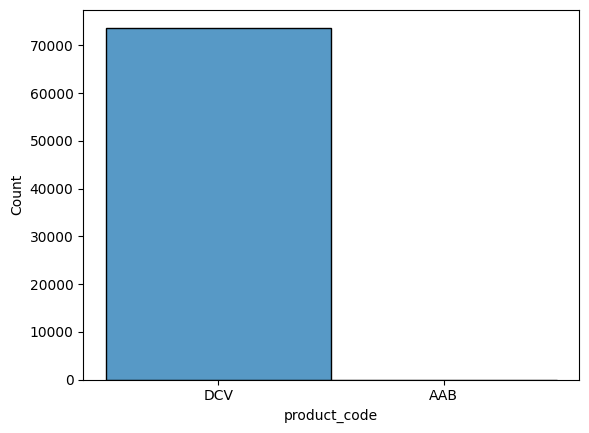

In [10]:
sns.histplot(data=df, x="product_code")

In [11]:
df['product_code'].value_counts()

product_code
DCV    73711
AAB        1
Name: count, dtype: int64

In [12]:
df.loc[df['product_code'] == 'AAB']

,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
67973,NaN,2023-03-02,272556159.0,AAB,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df['account_own_flg'].value_counts()

account_own_flg
1    63036
0    10676
Name: count, dtype: int64

In [31]:
dcv = df.loc[df['product_code'] == 'DCV']

<Axes: xlabel='account_own_flg', ylabel='Count'>

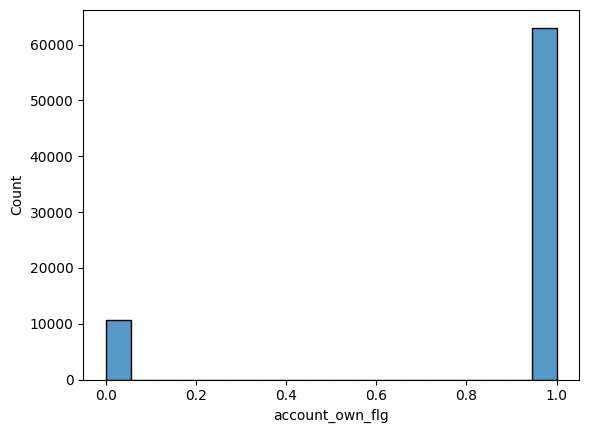

In [19]:
sns.histplot(data=dcv, x='account_own_flg')

In [20]:
has_loyal_black_premium = dcv.loc[dcv['account_own_flg'] == 1]
has_not_loyal_black_premium = dcv.loc[dcv['account_own_flg'] == 0]

<Axes: xlabel='Count', ylabel='age_segment'>

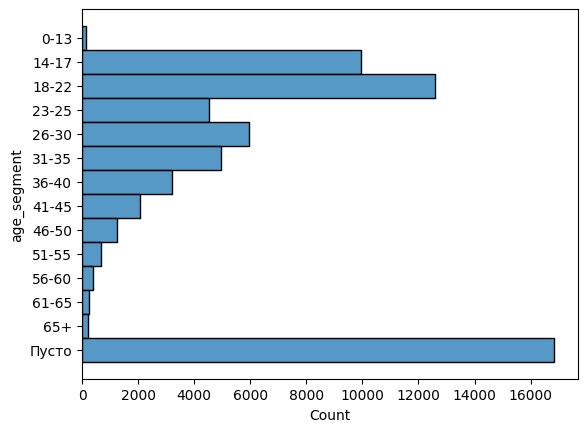

In [28]:
sns.histplot(data=has_loyal_black_premium.sort_values(by='age_segment'), y='age_segment', binwidth=2)

<Axes: xlabel='Count', ylabel='age_segment'>

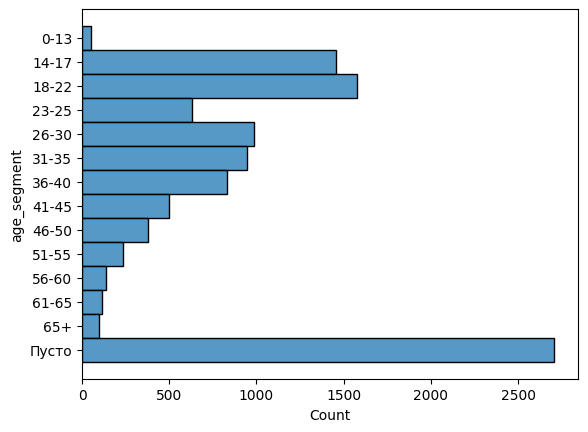

In [29]:
sns.histplot(data=has_not_loyal_black_premium.sort_values(by='age_segment'), y='age_segment', binwidth=2)

<Axes: xlabel='metall_flg', ylabel='Count'>

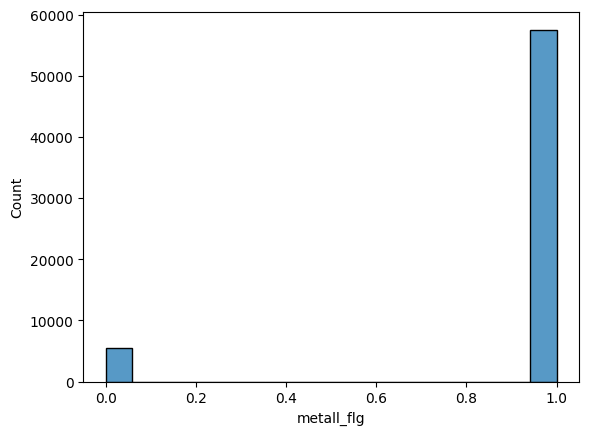

In [34]:
sns.histplot(data=has_loyal_black_premium, x='metall_flg')

<Axes: xlabel='metall_flg', ylabel='Count'>

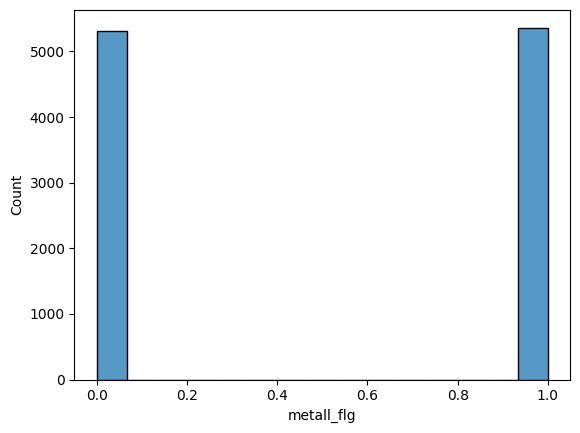

In [35]:
sns.histplot(data=has_not_loyal_black_premium, x='metall_flg')

In [36]:
df['res_segment'].value_counts()

res_segment
РФ            50118
Пусто         17115
Восток СНГ     4555
Запад СНГ       938
Остальное       919
Name: count, dtype: int64

In [44]:
df.select_dtypes(exclude=['object', 'datetime64[ns]']).dtypes.value_counts()

int64      35
float64    16
Name: count, dtype: int64

In [ ]:
for_heatmap = df.drop(['application_id', 'primary_income_dt', 'product_code'])

<Axes: >

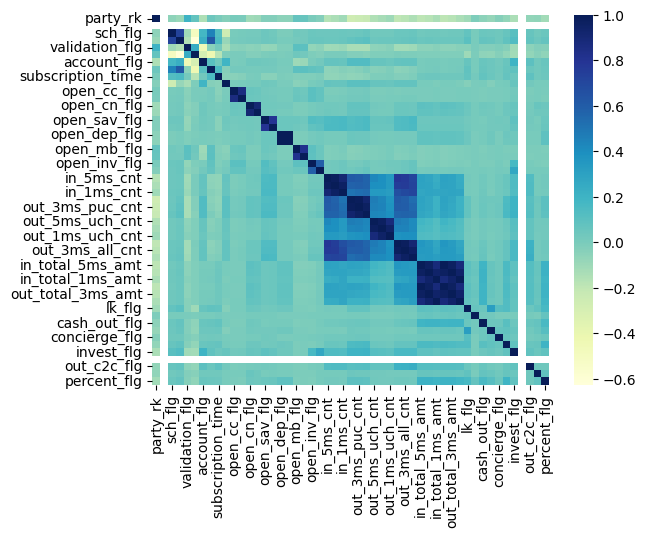

In [47]:
sns.heatmap(has_loyal_black_premium.select_dtypes(exclude=['object', 'datetime64[ns]']).corr(), cmap='YlGnBu')

<Axes: >

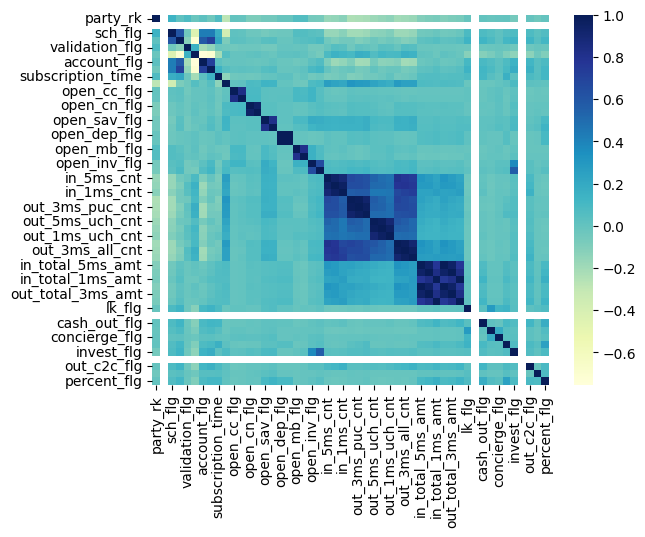

In [48]:
sns.heatmap(has_not_loyal_black_premium.select_dtypes(exclude=['object', 'datetime64[ns]']).corr(), cmap='YlGnBu')